In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/13_dropout_layer/sonar_dataset.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [35]:
df.shape

(208, 61)

In [36]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [37]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [38]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [39]:
df1 = df.copy()

In [40]:
df1[60].replace({'M':1, 'R':0}, inplace=True)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [41]:
X = df1.drop(60, axis=1)
y = df1[60]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166, 60), (42, 60), (166,), (42,))

Model without dropout layer

In [42]:
model = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation= 'relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.5241 
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.5783
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6392 - accuracy: 0.7048
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.7530
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.7349
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.7651
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7831
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.7892
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.7771
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8133
Epoch 11

In [43]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.7359 - accuracy: 0.8571


[0.7359469532966614, 0.8571428656578064]

Here we got 1 score on training samples but .85 score on test samples. So it's look like our model was overfitted.

In [50]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 3ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [51]:
y_test[:10]

207    1
206    1
158    1
131    1
146    1
175    1
72     0
15     0
196    1
195    1
Name: 60, dtype: int64

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.96      0.83      0.89        30

    accuracy                           0.86        42
   macro avg       0.82      0.88      0.84        42
weighted avg       0.88      0.86      0.86        42



Text(33.0, 0.5, 'Truth')

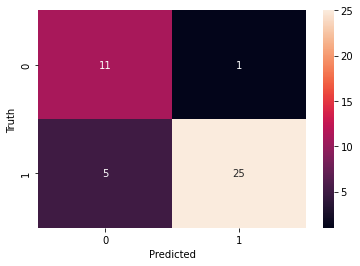

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Model with dropout layer

In [64]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.7025 - accuracy: 0.5000
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5482
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5663
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6627
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.6506
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6265
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.6506
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6048 - accuracy: 0.6867
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6566
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5984 - accuracy: 0.6747
Epoch 11/

In [65]:
modeld.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.9048


[0.3503682613372803, 0.9047619104385376]

Look we got 90% of score with dropout layers. It's good.

In [66]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

2/2 [==============================] - 0s 3ms/step


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.96      0.83      0.89        30

    accuracy                           0.86        42
   macro avg       0.82      0.88      0.84        42
weighted avg       0.88      0.86      0.86        42



Text(33.0, 0.5, 'Truth')

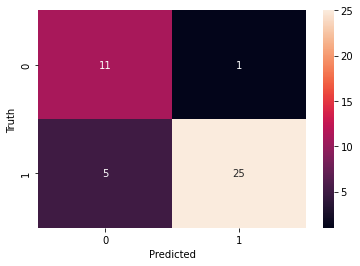

In [69]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')